In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("../data/np0.smi", header = None, names = ['smiles'])

In [4]:
import os
from rdkit.Chem import rdBase, RDConfig
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors

In [5]:
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)


RDKit WARNING: [11:10:08] Conflicting single bond directions around double bond at index 1.
RDKit WARNING: [11:10:08]   BondStereo set to STEREONONE and single bond directions set to NONE.


In [6]:
data["smi"] = data['mol'].apply(Chem.MolToSmiles, isomericSmiles=False)

In [7]:
data[["smiles","smi"]].head(n = 200)

,smiles,smi
0,C=C1C(=O)O[C@H]2C[C@@H](C)[C@@H]3CCC(=O)[C@@]3(C)C[C@H]12,C=C1C(=O)OC2CC(C)C3CCC(=O)C3(C)CC12
1,CC(=O)O[C@@H]1c2c(C)coc2C(=O)[C@@]23O[C@@H]2CC[C@H](C)[C@@]13C,CC(=O)OC1c2c(C)coc2C(=O)C23OC2CCC(C)C13C
2,C/C=C(\C)C(=O)O[C@H]1C=C(CO)C(=O)[C@H](OC(C)=O)[C@H]1C(C)C,CC=C(C)C(=O)OC1C=C(CO)C(=O)C(OC(C)=O)C1C(C)C
3,C=C1C(=O)O[C@H]2[C@@H]1[C@H](OC(=O)/C(=C/CO)COC(=O)/C(C)=C/CO)CC(=C)[C@@H]1CC(=O)[C@@H](C)[C@@H]12,C=C1CC(OC(=O)C(=CCO)COC(=O)C(C)=CCO)C2C(=C)C(=O)OC2C2C(C)C(=O)CC12
4,C=C1C(=O)O[C@@H]2[C@H]1CC(=O)[C@H](C)[C@@](O)(C(=O)/C=C/C)[C@H]2OC(=O)[C@H](C)CC,C=C1C(=O)OC2C1CC(=O)C(C)C(O)(C(=O)C=CC)C2OC(=O)C(C)CC
5,C=C1C(=O)O[C@@H]2[C@H]1[C@H](O)C[C@]1(C)[C@@H](O)CC=C(C)[C@@H]21,C=C1C(=O)OC2C1C(O)CC1(C)C(O)CC=C(C)C21
6,C=C(COC(=O)C(C)C)[C@H]1Oc2cc(C(C)=O)ccc2[C@@H]1OC(=O)C(C)C,C=C(COC(=O)C(C)C)C1Oc2cc(C(C)=O)ccc2C1OC(=O)C(C)C
7,O=C(/C=C/c1ccccc1)C[C@@H](O)CCc1ccccc1,O=C(C=Cc1ccccc1)CC(O)CCc1ccccc1
8,C=C1CC[C@H]2[C@@](C)(C(=O)O)CCC[C@]2(C)[C@H]1CC[C@H](C)CCOC(C)=O,C=C1CCC2C(C)(C(=O)O)CCCC2(C)C1CCC(C)CCOC(C)=O
9,COc1cc(C=O)cc(OC)c1OCC=C(C)C,COc1cc(C=O)cc(OC)c1OCC=C(C)C


In [8]:
data['mw'] = data['mol'].apply(Descriptors.MolWt)

In [9]:
data['logp'] = data['mol'].apply(Descriptors.MolLogP)

In [10]:
data['qed'] = data['mol'].apply(Descriptors.qed)

In [11]:
del data['mol']

In [12]:
datanoch = data[["smi","mw","logp","qed"]]
data = data[["smiles","mw","logp","qed"]]

In [13]:
datanoch.to_csv('../data/npnoch.csv', index = False)
data.to_csv("../data/np.csv", index = False)

In [69]:
d = datanoch

In [70]:
ring3smi = d['smi'].str.contains('|'.join(str(x) for x in range(100,999)))

In [71]:
d = d[-ring3smi]

In [72]:
d.shape

(84605, 4)

In [73]:
# Remove smiles with three-way rings
badsmint = []
for n in range(10,99):
    ny = sum(d["smi"].str.contains(str(n)))
    if ny >= 150:
        print(n, ny)
    else:
        badsmint.append(n)

12 12056
13 1792
14 515
21 4235
23 5557
24 403
31 803
32 1910
34 2221
35 260
42 267
43 1960
45 804
54 296
56 306


In [74]:
ring2smi = d['smi'].str.contains('|'.join(str(x) for x in badsmint))

In [75]:
d = d[-ring2smi]

In [76]:
d.shape

(83695, 4)

In [77]:
for n in range(10,99):
    ny = sum(d["smi"].str.contains(str(n)))
    if ny > 0:
        print(n, ny)

12 11874
13 1723
14 452
21 4184
23 5294
24 369
31 787
32 1897
34 2086
35 234
42 259
43 1914
45 733
54 266
56 210


In [67]:
d.to_csv('../data/nppurg.csv', index = False)

In [38]:
Draw.MolsToGridImage(d432["mol"],molsPerRow=4)

NameError: name 'Draw' is not defined

In [52]:
sum(ring3smi)

0

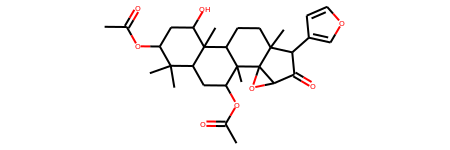

In [34]:
Chem.MolFromSmiles(d['smi'].iloc[954])

In [62]:
d['smi'].iloc[583]

'CC1CC2OC3(OC2C(C)(C)O)C1C1(C)CCC24CC25CCC(OC2OCC(O)C(O)C2O)C(C)(C)C5CCC4C1(C)C3O'